## Observations and Insights 

In [ ]:
Despite there being less female mice then male, female mice on average weighed more than male mice.
By extension this also saw that female mice had larger tumor size. 

Due to timepoints only being checked at intervals, if a mouse died inbetween time points, there is no data on that mouse going forward.

Ramicane had the lowest number of timepoints monitored but not the highest average tumor sizes. This could be because the mice were dying before the tumors could grow more.
The largest average tumor sizes go to mice who were given Ketapril.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [2]:
# import data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata)
print(study_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [3]:
# Combine the data into a single dataset
merged = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'left')
# Display the data table for preview
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice.
merged['Mouse ID'].count()

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merged["Mouse ID"].nunique()

249

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
merged.groupby(['Mouse ID']).size().sort_values(ascending = False)

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Length: 249, dtype: int64

In [8]:
merged.groupby(['Mouse ID', 'Timepoint']).size().sort_values(ascending = False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = merged['Mouse ID'] != 'g989'

mergeClean = merged.loc[mask].reset_index(drop = True)

mergeClean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
mergeClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
# Checking the number of mice in the clean DataFrame.
mergeClean['Mouse ID'].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = mergeClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mergeClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = mergeClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = mergeClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mergeClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [13]:
# Assemble the resulting series into a single summary dataframe.

stats = pd.concat([mean, median, var, stdev, sem], axis = 1)
stats.columns = ['Mean', 'Median', 'Variance', 'Std Dev', 'SEM']
stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

stats_agg = mergeClean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
stats_agg.columns = ['Mean', 'Median', 'Variance', 'Std Dev', 'SEM']
stats_agg


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen = mergeClean['Drug Regimen'].value_counts().reset_index()
regimen


,index,Drug Regimen
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


In [16]:
regimen.columns = ['Drug_Name', 'Count']
regimen

,Drug_Name,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


<AxesSubplot:xlabel='Drug_Name'>

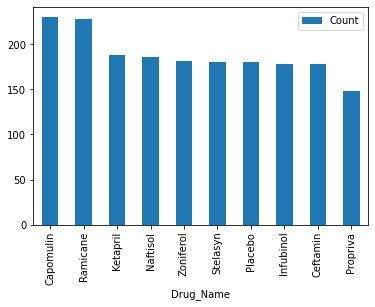

In [17]:
regimen.plot.bar(x = 'Drug_Name', y = 'Count')

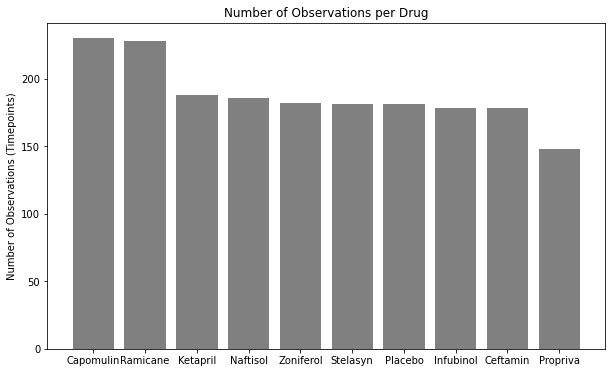

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize = (10, 6))
plt.bar(regimen.Drug_Name, regimen.Count, color = 'Gray')
plt.title("Number of Observations per Drug")
plt.ylabel("Number of Observations (Timepoints)")
plt.show()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = mergeClean['Sex'].value_counts().reset_index()
gender

,index,Sex
0,Male,958
1,Female,922


In [20]:
gender.columns = ['Sex', 'Count']

<AxesSubplot:ylabel='Count'>

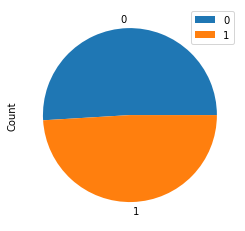

In [21]:
gender.plot.pie(x = 'Sex', y = 'Count')

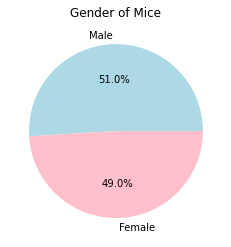

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender['Count'], labels = gender.Sex, colors = {'lightblue', 'pink'}, autopct='%1.1f%%') # https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
plt.title('Gender of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTime = mergeClean.groupby('Mouse ID').Timepoint.max().reset_index()
lastTime

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df_merge = pd.merge(mergeClean, lastTime, on = ['Mouse ID', 'Timepoint'], how = 'inner')
df_merge

# only show the regimens we want ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
mask2 = df_merge['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
mergeTime = df_merge.loc[mask2].reset_index(drop = True)

mergeTime

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Code from prof Booth
for drug in drug_regimen:
    plot = mergeTime.loc[mergeTime['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    low_q = plot.quantile(.25)
    high_q = plot.quantile(.75)
    iqr = high_q - low_q
    
    lower_bound = low_q - 1.5*iqr
    upper_bound = high_q + 1.5*iqr
    
    mask3 = (mergeTime["Drug Regimen"] == drug) & ((mergeTime["Tumor Volume (mm3)"] > upper_bound) | (mergeTime["Tumor Volume (mm3)"] < lower_bound))
    outliers = mergeTime.loc[mask3]
    
    print(outliers)
    
    tumor_vol.append(plot)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
4     c326          5           36.321346                 0    Infubinol   

      Sex  Age_months  Weight (g)  
4  Female          18          25  
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


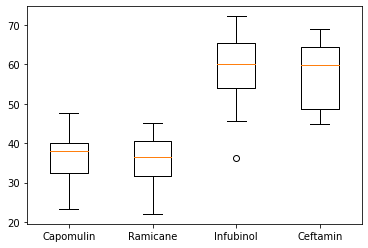

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol, labels = drug_regimen)
plt.show()

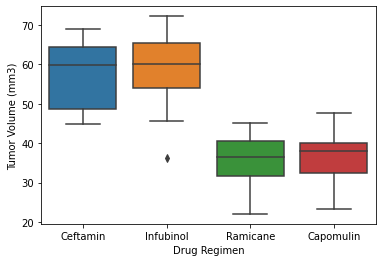

In [27]:
sns.boxplot(data = mergeTime, x = 'Drug Regimen', y = 'Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mask4 = mergeClean['Drug Regimen'] == 'Capomulin'

mice = mergeClean.loc[mask4].groupby('Mouse ID')[['Timepoint']].count()
mice

,Timepoint
Mouse ID,
b128,10
b742,10
f966,5
g288,10
g316,10
i557,10
i738,10
j119,10
j246,8


In [29]:
# chose first mouse with all timepoints
mask5 = mergeClean['Mouse ID'] == 'b128'

# get mouse and remove unused columns
lineData = mergeClean.loc[mask5].drop(['Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'], axis = 1)
lineData

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,b128,0,45.000000,Capomulin
468,b128,5,45.651331,Capomulin
674,b128,10,43.270852,Capomulin
713,b128,15,43.784893,Capomulin
925,b128,20,42.731552,Capomulin
1257,b128,25,43.262145,Capomulin
1388,b128,30,40.605335,Capomulin
1535,b128,35,37.967644,Capomulin
1616,b128,40,38.379726,Capomulin
1751,b128,45,38.982878,Capomulin


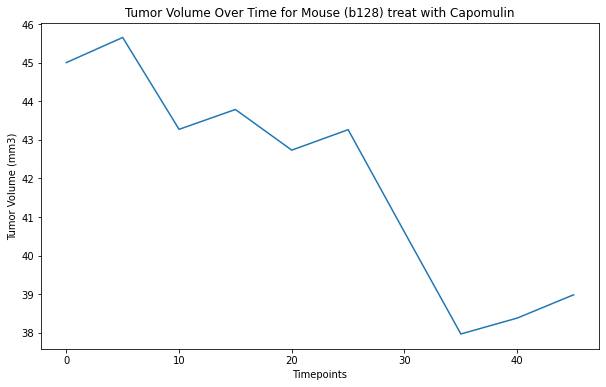

In [30]:
# plot line graph
plt.figure(figsize = (10, 6))
plt.plot(lineData.Timepoint, lineData['Tumor Volume (mm3)'])
plt.title('Tumor Volume Over Time for Mouse (b128) treat with Capomulin')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter = mergeClean.loc[mask4]
scatter

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
224,j246,0,45.000000,0,Capomulin,Female,21,21
225,r554,0,45.000000,0,Capomulin,Female,8,17
226,s185,0,45.000000,0,Capomulin,Female,3,17
227,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23
1846,j119,45,38.125164,1,Capomulin,Female,7,23
1865,i557,45,47.685963,1,Capomulin,Female,1,24
1875,r944,45,41.581521,2,Capomulin,Male,12,25


In [32]:
scatterData = scatter.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()
scatterData

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


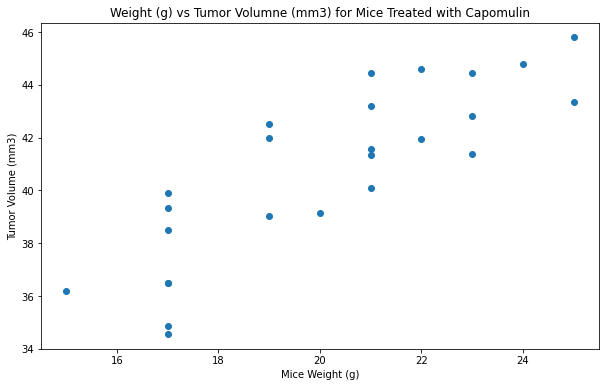

In [33]:
# plot data
plt.figure(figsize = (10, 6))
plt.scatter(scatterData['Weight (g)'], scatterData['Tumor Volume (mm3)'])
plt.title('Weight (g) vs Tumor Volumne (mm3) for Mice Treated with Capomulin')
plt.xlabel('Mice Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

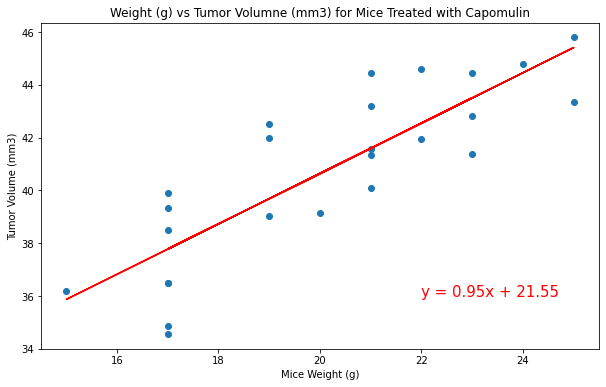

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
X = scatterData['Weight (g)']
y = scatterData['Tumor Volume (mm3)']
plt.figure(figsize = (10, 6))
(slope, intercept, rvalue, pvalue, stderr) = linregress(X, y)
regress_values = X * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X, y)
plt.plot(X, regress_values,"r-")
plt.annotate(line_eq,(22, 36),fontsize=15,color="red")
plt.title('Weight (g) vs Tumor Volumne (mm3) for Mice Treated with Capomulin')
plt.xlabel('Mice Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [37]:
mergeClean.groupby('Sex')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

,Weight (g),Tumor Volume (mm3)
Sex,,
Female,25.909978,51.083168
Male,25.419624,49.811764


In [39]:
mergeClean.groupby('Drug Regimen')[['Timepoint', 'Tumor Volume (mm3)']].mean()

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,21.565217,40.675741
Ceftamin,19.747191,52.591172
Infubinol,18.174157,52.884795
Ketapril,19.707447,55.235638
Naftisol,19.623656,54.331565
Placebo,18.674033,54.033581
Propriva,17.060811,52.320930
Ramicane,21.425439,40.216745
Stelasyn,19.226519,54.233149
